%matplotlib -l

In [ ]:
%matplotlib -l

In [ ]:
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.path import Path
import numpy as np

In [ ]:
star = Path.unit_regular_star(6)
circle = Path.unit_circle()

verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = Path(verts, codes)


plt.plot(np.arange(10)**2, '--r', marker=cut_star, markersize=15)

```python
    @classmethod
    def unit_circle(cls):
        """
        Return the readonly :class:`Path` of the unit circle.

        For most cases, :func:`Path.circle` will be what you want.
        """
        if cls._unit_circle is None:
            cls._unit_circle = cls.circle(center=(0, 0), radius=1,
                                          readonly=True)
        return cls._unit_circle
    
    @classmethod
    def circle(cls, center=(0., 0.), radius=1., readonly=False):
        """
        Return a `Path` representing a circle of a given radius and center.

        Parameters
        ----------
        center : (float, float), default: (0, 0)
            The center of the circle.
        radius : float, default: 1
            The radius of the circle.
        readonly : bool
            Whether the created path should have the "readonly" argument
            set when creating the Path instance.

        Notes
        -----
        The circle is approximated using 8 cubic Bezier curves, as described in

          Lancaster, Don.  `Approximating a Circle or an Ellipse Using Four
          Bezier Cubic Splines <https://www.tinaja.com/glib/ellipse4.pdf>`_.
        """
        MAGIC = 0.2652031
        SQRTHALF = np.sqrt(0.5)
        MAGIC45 = SQRTHALF * MAGIC

        vertices = np.array([[0.0, -1.0],

                             [MAGIC, -1.0],
                             [SQRTHALF-MAGIC45, -SQRTHALF-MAGIC45],
                             [SQRTHALF, -SQRTHALF],

                             [SQRTHALF+MAGIC45, -SQRTHALF+MAGIC45],
                             [1.0, -MAGIC],
                             [1.0, 0.0],

                             [1.0, MAGIC],
                             [SQRTHALF+MAGIC45, SQRTHALF-MAGIC45],
                             [SQRTHALF, SQRTHALF],

                             [SQRTHALF-MAGIC45, SQRTHALF+MAGIC45],
                             [MAGIC, 1.0],
                             [0.0, 1.0],

                             [-MAGIC, 1.0],
                             [-SQRTHALF+MAGIC45, SQRTHALF+MAGIC45],
                             [-SQRTHALF, SQRTHALF],

                             [-SQRTHALF-MAGIC45, SQRTHALF-MAGIC45],
                             [-1.0, MAGIC],
                             [-1.0, 0.0],

                             [-1.0, -MAGIC],
                             [-SQRTHALF-MAGIC45, -SQRTHALF+MAGIC45],
                             [-SQRTHALF, -SQRTHALF],

                             [-SQRTHALF+MAGIC45, -SQRTHALF-MAGIC45],
                             [-MAGIC, -1.0],
                             [0.0, -1.0],

                             [0.0, -1.0]],
                            dtype=float)

        codes = [cls.CURVE4] * 26
        codes[0] = cls.MOVETO
        codes[-1] = cls.CLOSEPOLY
        return Path(vertices * radius + center, codes, readonly=readonly) 
    
```

In [9]:
MAGIC = 0.2652031           # 0.2652031
SQRTHALF = np.sqrt(0.5)     # 0.7071067811865476
MAGIC45 = SQRTHALF * MAGIC  # 0.1875269104016941

In [8]:
[[0.0, -1.0],

[MAGIC, -1.0],
[SQRTHALF-MAGIC45, -SQRTHALF-MAGIC45],
[SQRTHALF, -SQRTHALF],

[SQRTHALF+MAGIC45, -SQRTHALF+MAGIC45],
[1.0, -MAGIC],
[1.0, 0.0]]

0.7071067811865476

In [12]:
x = [0,    0.2652031,  0.5195798707848535,  0.7071067811865476,  0.8946336915882417,  1.0,       1.0]

In [15]:
y = [-1.0, -1.0,      -0.8946336915882417, -0.7071067811865476, -0.5195798707848535, -0.2652031, 0.0]

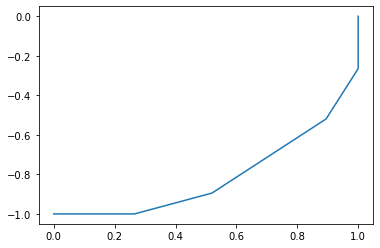

In [16]:
plt.plot(x, y)

In [18]:
np.vstack((x,y)).T

array([[ 0.        , -1.        ],
       [ 0.2652031 , -1.        ],
       [ 0.51957987, -0.89463369],
       [ 0.70710678, -0.70710678],
       [ 0.89463369, -0.51957987],
       [ 1.        , -0.2652031 ],
       [ 1.        ,  0.        ]])

In [19]:
codes = [Path.CURVE4] * 7
codes[0] = Path.MOVETO
codes[-1] = Path.CLOSEPOLY

In [20]:
codes

[1, 4, 4, 4, 4, 4, 79]

In [14]:
-0.7071067811865476+0.1875269104016941

-0.5195798707848535

In [11]:
0.7071067811865476+0.1875269104016941

0.8946336915882417

In [22]:
path = Path(np.vstack((x,y)).T, codes)

In [33]:
patch = patches.PathPatch(path)

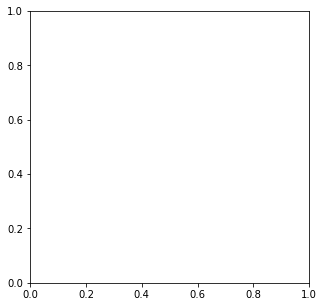

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

In [ ]:
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

In [ ]:
ax.add_patch(patch)

In [ ]:
fig

In [36]:
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

(-1.0, 1.0)

In [38]:
ax.plot(x,y)

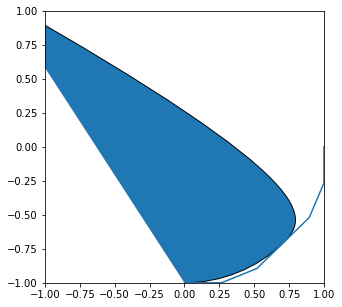

In [39]:
fig